# Programming Assignment \# 1 Carter Reid

__Goal:__ 

This programming assignment will ask you to do the following tasks.

(a) Implement some of the sorting algorithms for sorting integer data in ascending order in python3.
  - Simple sort (implemented for you)
  - Bubble Sort (read from book or online sources)
  - Merge Sort
  - Quicksort 
  
  
(b) Your implementation must count the number of *compare* operations each sorting algorithm carries out.
    
(c) You must formulate a series of arrays of lengths from $5$ to $100$  (step by 5), that will form the worst case of these
sorting algorithms and plot the number of comparisons in the __worst case__ vs. size of input array (x axis)
 
(d) Generate $1000$ random inputs for each size and compute average time. Plot the size of input array (x axis) vs. number of comparisons (y axis)

----
## Simple Sort

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def simple_sort(a):
    # must sort the array a in place and return the number of comparisons
    num_compare = 0
    n = len(a)
    for i in range(0, n): # i goes from 0 to n-1
        for j in range(i+1, n): # j goes from i+1 to n-1
            num_compare = num_compare + 1
            if a[i] >= a[j]:
                # swap
                a[i], a[j] = a[j], a[i]
    return num_compare

In [2]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = simple_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity analysis of simple sort.

Note that simple sort consists of two loops and regardless of the input array, the first loop runs from n steps. And the second loop runs $n-i-1$ steps where $i$ is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$

The code below plots it for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

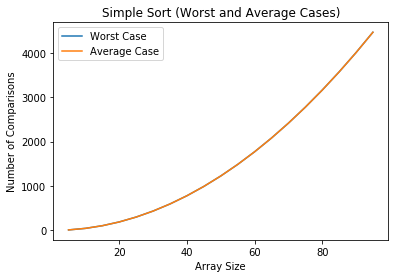

In [3]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = simple_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = simple_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Simple Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----

### Bubble Sort

In [4]:
def bubble_sort(a):
    # Implement code to bubble sort the given array a in place.
    # Also return the number of comparisons. 
    num_compares = 0
    # ... blah blah blah .. 
    n = len(a)
    for i in range(0,(n-1)):
        for j in range(0,n-i-1):
            num_compares = num_compares +1
            if a[j] > a[j+1]:
                #swap
                a[j], a[j+1] = a[j+1], a[j]
    return num_compares

### Complexity Analysis of Bubble Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __

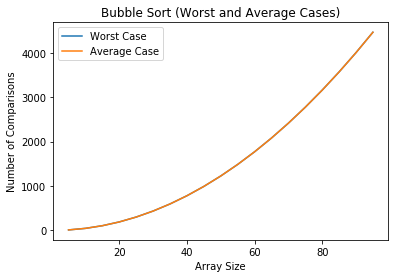

In [5]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them

##There is not worst case for bubble sort, it runs in constant time
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    a.reverse()
    nc = bubble_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = bubble_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Bubble Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Merge Sort

In [19]:
def merge_sort(a):
    # Implement the code for merge sort
    # Use a function merge_sort_recursive to implement the recursive call
    # Be careful in counting number of comparisons since you should include comparisons in the merge part.
    # Also: code needs to sort the array a. You may have to copy things over from a temp array back into a.
    
    
    pointer = [1] #using a list size 1 as a pointer becuase... python
    pointer[0] = 0
    
    c = a.copy() #easy way to copy length of a, don't care about contents
    
    c = merge_sort_recursive(a, pointer)
    
    #copying my temp list to a
    for x in range(0,len(a)):
        a[x] = c[x]

    return pointer[0]
    #return merge_sort_recursive(a, 0, len(a)-1)

#yea i dont know about merge sort recursive business, but heres my merge sort algorithm
def merge_sort_recursive(ar, pointer):
    
    #initialize some stuff
    n = len(ar)-1
    
    #base case:
    pointer[0] = pointer[0] + 1
    if len(ar) == 1:
        return ar
    else:
        #recursive call to divide more
        left_list = merge_sort_recursive(ar[:(n//2)+1], pointer)
        right_list = merge_sort_recursive(ar[(n//2)+1:], pointer)
        
        #merge part
        c = []
        i,j = 0,0
        while(i <= len(left_list)-1 and j <= len(right_list)-1):
            pointer[0] = pointer[0] + 1
            if (left_list[i] <= right_list[j]):
                c.append(left_list[i])
                i = i + 1
            else:
                c.append(right_list[j])
                j = j + 1
                
        while(i <= len(left_list)-1):
            #pointer[0] = pointer[0] + 1
            c.append(left_list[i])
            i = i+ 1
            
        while(j <= len(right_list)-1):
            #pointer[0] = pointer[0] + 1
            c.append(right_list[j])
            j = j + 1
        return c
    
    
        

### Complexity Analysis of Merge Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __

Worst case for merge sort, woudl be a comparison at every step. It could be achieved by splitting the list in two, taking every other number and putting it on the left side and the remaining ones on the right. Doing this recursively till a base case of 2 should yield a shuffled array that requires a comparison at every part of merge sort.
Example: {0,1,2,3,4,5,6,7,8,9} sorted, worst previous case would be: {0,2,4,6,8} and {1,3,5,7,9}
the worst previous case for {0,2,4,6,8} would be 


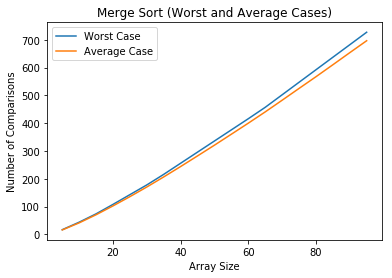

In [20]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
# Code for running sorting and generating number of compares

#this should theoretically create the worst case for merge sort, by splitting the array recursively to maximize the comparisons
#while I have not been able to extensivly test this to be the proven worst case, it is worse than the average case at least
def make_worst_case_merge(array):
    if (len(array) <= 1):
        return array
    elif (len(array) == 2):
        array[0],array[1] = array[1],array[0]
        return array
    left = make_worst_case_merge(array[0::2])
    right = make_worst_case_merge(array[1::2])
    return  left + right

    
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    b = make_worst_case_merge(a)
    nc = merge_sort(b)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = merge_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Merge Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Quick Sort


In [16]:
def quick_sort(a):
    # Implement code for quick sort
    # Must sort the array a in place
    # Must return the number of comparisons
    
    #my python version of *pointer
    pointer = []
    pointer.append(0)
    
    low = 0
    high = len(a)-1
    quicksort(a, low, high, pointer)
    return pointer[0]

def quicksort(a, low, high, pointer):
    if (low < high):
        p = partition(a, low, high, pointer)
        quicksort(a, low, p-1, pointer)
        quicksort(a, p+1, high, pointer)
    else:
        return

def partition(a, low, high, pointer):
    #pivot
    x = a[high]
    i = low -1
    j = low
    while (j < high):
        pointer[0] = pointer[0] + 1
        if (a[j] < x):
            i = i +1
            #swap data i and j
            a[i], a[j] = a[j], a[i]
        j = j+1
    pointer[0] = pointer[0] + 1     
    if (a[high] < a[i+1]):
        #swap(a, i+1, high)
        a[i+1], a[high] = a[high],a[i+1]
    return i+1


### Complexity Analysis of Quick Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __

Worst case for quicksort is an already sorted list, especially because I selected my pivot to be the last element in each partition, which is guaranteeing that I maximize the number of comparisons in each call of quicksort/partition


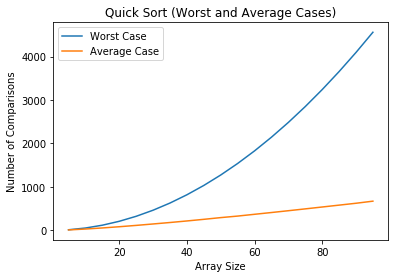

In [18]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = quick_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = quick_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Quick Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

-----
## Testing Code: Do not edit



In [10]:
def test_sorting_algorithm(sort_fun, sz, num_trials):
    num_passed = 0
    for i in range(num_trials):
        a = create_random_shuffled_array(sz)
        a_orig = list(a) # make a copy
        b = sorted(a)
        nc = sort_fun(a)
        if a == b:
            num_passed = num_passed + 1
        else:
            print('----')
            print('FAILED: Input = ', a_orig)
            print('Expected: ', b)
            print('Obtained:', a)
            print('----')
    print('Num Trials = ', num_trials)
    print('Num Passed = ', num_passed)

In [11]:
test_sorting_algorithm(simple_sort, 50, 100)

Num Trials =  100
Num Passed =  100


In [12]:
test_sorting_algorithm(bubble_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [21]:
test_sorting_algorithm(merge_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [14]:
test_sorting_algorithm(quick_sort, 10, 10)

Num Trials =  10
Num Passed =  10
